In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('../../data/processed/merged_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65551 entries, 0 to 65550
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           65551 non-null  int64  
 1   Township            65551 non-null  int64  
 2   SqFtLot             65551 non-null  int64  
 3   WfntFootage         65551 non-null  int64  
 4   BldgGrade           65551 non-null  int64  
 5   SqFtUnfinFull       65551 non-null  int64  
 6   SqFtUnfinHalf       65551 non-null  int64  
 7   SqFtTotLiving       65551 non-null  int64  
 8   SqFtTotBasement     65551 non-null  int64  
 9   SqFtFinBasement     65551 non-null  int64  
 10  FinBasementGrade    65551 non-null  int64  
 11  SqFtGarageBasement  65551 non-null  int64  
 12  SqFtGarageAttached  65551 non-null  int64  
 13  SqFtOpenPorch       65551 non-null  int64  
 14  SqFtEnclosedPorch   65551 non-null  int64  
 15  SqFtDeck            65551 non-null  int64  
 16  Heat

In [3]:
df.head()

,SalePrice,Township,SqFtLot,WfntFootage,BldgGrade,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,Bedrooms,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Condition,AddnlCost,SaleWarning,TotBathrooms
0,800000,26,10560,0,9,0,0,4200,2410,1850,8,560,0,220,0,390,7,3,3,0,1,0,1,1968,0,0,4,0,15 51,3.25
1,730000,26,9853,0,7,0,0,2410,1200,1200,6,0,500,110,0,0,5,2,5,0,1,0,1,1969,0,0,3,0,,3.00
2,875000,25,3600,0,8,0,0,1890,750,0,0,220,0,190,0,0,5,1,4,0,1,0,0,1919,0,0,3,0,,1.00
3,249950,26,7750,0,8,0,0,3340,2180,960,8,750,0,250,0,0,5,2,5,2,0,0,0,2019,0,58,3,5000,10,3.25
4,205000,26,7750,0,8,0,0,3340,2180,960,8,750,0,250,0,0,5,2,5,2,0,0,0,2019,0,58,3,5000,15,3.25


In [4]:
# Checking for correlation.

In [5]:
corr = np.abs(df.corr())

In [6]:
corr = corr.sort_values('SalePrice', ascending=False)

In [7]:
# Including mask for readibility.

In [8]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

In [9]:
# Creating correlogram to display correlation data.

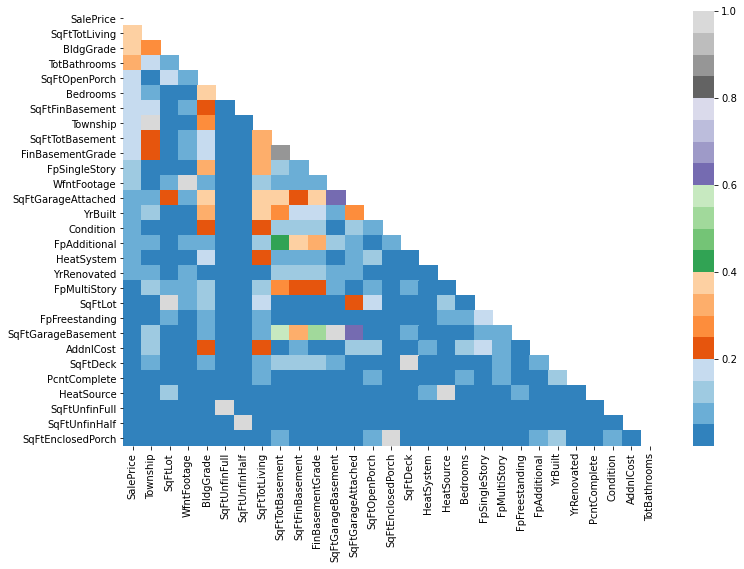

In [10]:
fig1, ax1 = plt.subplots(figsize=(12,8))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="tab20c");

### Model 1 - Positively Correlated Variables

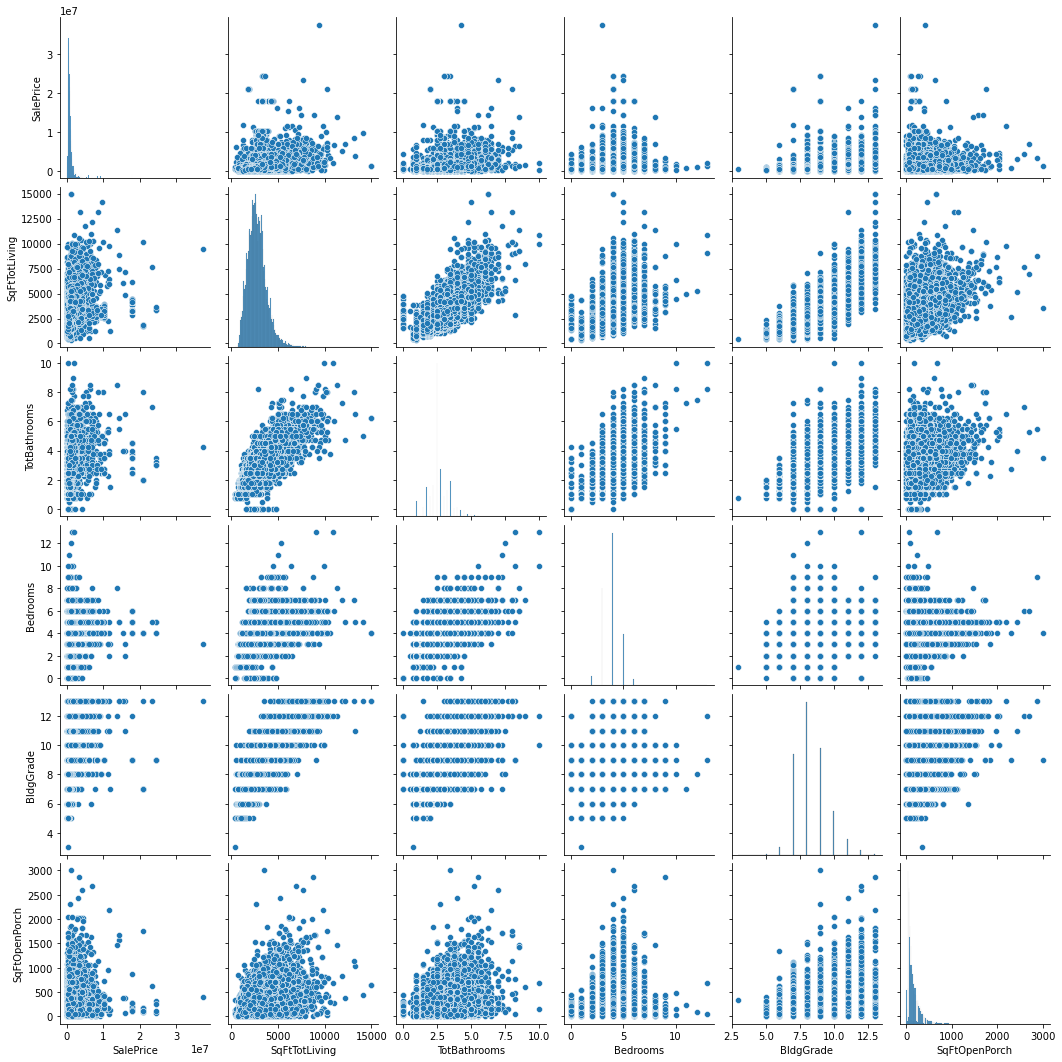

In [11]:
pos_cor_cols = ['SalePrice','SqFtTotLiving', 'TotBathrooms',
                'Bedrooms', 'BldgGrade', 'SqFtOpenPorch']
pos_cor_cols_df = df[pos_cor_cols]
sns.pairplot(pos_cor_cols_df)
plt.show()

The Pairplot visualizes the correlation between the selected variables. While none of variables appear to be linear, SqFtTotLiving had the highest correlation and will be used for further analysis.

In [12]:
fsm_df = df[["SalePrice", "SqFtTotLiving"]].copy()
fsm_df.dropna(inplace=True)

In [13]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data = fsm_df)
fsm_results = fsm.fit()

In [14]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                 1.178e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:48:45   Log-Likelihood:            -9.9856e+05
No. Observations:               65551   AIC:                         1.997e+06
Df Residuals:                   65549   BIC:                         1.997e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.181e+05   1.11e+04    -19.705      0.000    -2.4e+05   -1.96e+05
SqFtTotLiving   406.2319      3.742    108.550      0.000     398.897     413.567
==============================================================================
Omnibus:                   107659.227   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         96774287.230
Skew:                          10.995   Prob(JB):                         0.00
Kurtosis:                     189.944   Cond. No.                     8.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 1 Evaluation

R2 and Adj R2 are both 0.152 so only about 15% of the variability in SalePrice (dependent variable) can be  explained by SqFtTotLiving (independent variable) in this model.

The Prob(F-statistic) which estimates the likelylood that this model resulting the way it does by chance is 0.

##### Linearity

In [15]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow statistic: 1.0251003903836522
Rainbow p-value: 0.012417471243296625


The linear_rainbox(model_results) from Stats models null-hypothesis is that the model is linear. The alternate hypothesis is that it is not linear. The p-value is low meaning that we have sufficient evidence to reject the null-hypothesis. The model violates the assumption of linearity.

##### Normality

For this I used the Jarque-Bera test and Jarque-Bera (JB) pvalue. The null hypothesis is that the residuals are normally distributed.  The alternative is that they are not. The p-value is 0 meaning that normality is violated. 

##### Homoscadasticity

This can be visualized using the predicted SalePrice vs the residuals.

In [16]:
y = fsm_df['SalePrice']
y_hat = fsm_results.predict()

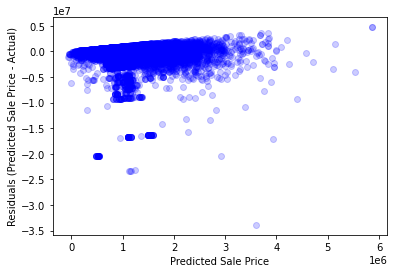

In [17]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Predicted Sale Price - Actual)")
ax2.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2);

In [18]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat,
                                                     fsm_df[['SalePrice']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-Statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-Statistic p-value: 0.0


Based on the graphical representation and het_breuschpagan test, we have sufficient evidence to reject the null hypothesis. There appears to be underestimation for SalePrice. Further investigation is needed for this dependent variable. 

### Model 2 - Correlated Variables

In [19]:
## Further investigating data for outliers and reasonability.

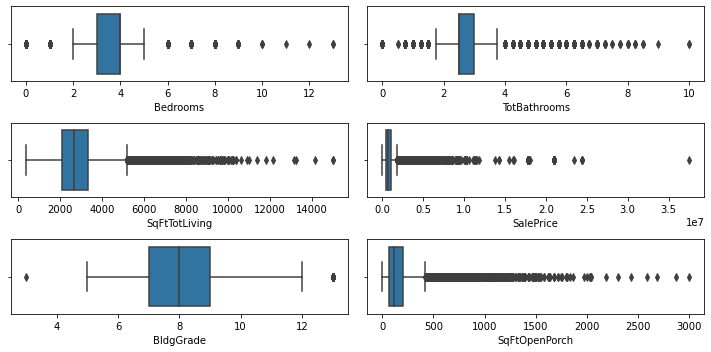

In [20]:
fig3, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(10,5))

sns.boxplot(x=df.Bedrooms, ax=ax1);
sns.boxplot(x=df.TotBathrooms, ax=ax2);
sns.boxplot(x=df.SqFtTotLiving, ax=ax3);
sns.boxplot(x=df.SalePrice, ax=ax4);
sns.boxplot(x=df.BldgGrade, ax=ax5);
sns.boxplot(x=df.SqFtOpenPorch, ax=ax6);

plt.tight_layout()

Model 1 calculated the skew of df as 10.995, a number that should be closer to zero for normally distributed data. Except for building grade, the boxplots show that the data is heavily skewed to the right and is heavliy impacted by outliers. Outliers will be removed. Then, a log transformation will be used to normalize the data for use in model 2.

In [21]:
df = df[(df.TotBathrooms >=1)] 
len(df) #65482

65482

In [22]:
df = df[(df.Bedrooms >=1)] 
len(df) #65462

65462

In [23]:
df = df[(df.SqFtOpenPorch >=1)] 
len(df) #64180

64180

In [24]:
non_normal = ['SalePrice','SqFtTotLiving', 'TotBathrooms',
              'Bedrooms','SqFtOpenPorch', 'BldgGrade']

Q1 = df[non_normal].quantile(0.25)
Q3 = df[non_normal].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[non_normal] < (Q1 - 1.5 * IQR)) |
          (df[non_normal] > (Q3 + 1.5 * IQR))).any(axis=1)]
len(df) #49400

49400

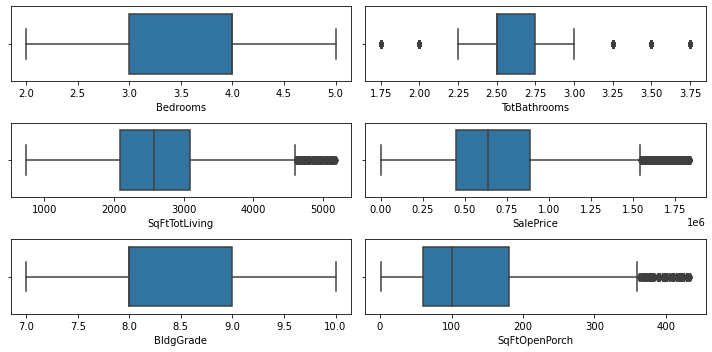

In [25]:
fig4, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(10,5))

sns.boxplot(x=df.Bedrooms, ax=ax1);
sns.boxplot(x=df.TotBathrooms, ax=ax2);
sns.boxplot(x=df.SqFtTotLiving, ax=ax3);
sns.boxplot(x=df.SalePrice, ax=ax4);
sns.boxplot(x=df.BldgGrade, ax=ax5);
sns.boxplot(x=df.SqFtOpenPorch, ax=ax6);

plt.tight_layout()

In [26]:
import numpy as np
non_normal2 = ['SalePrice','SqFtTotLiving', 'TotBathrooms',
              'Bedrooms','SqFtOpenPorch', 'BldgGrade']

for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.sqrt(x))

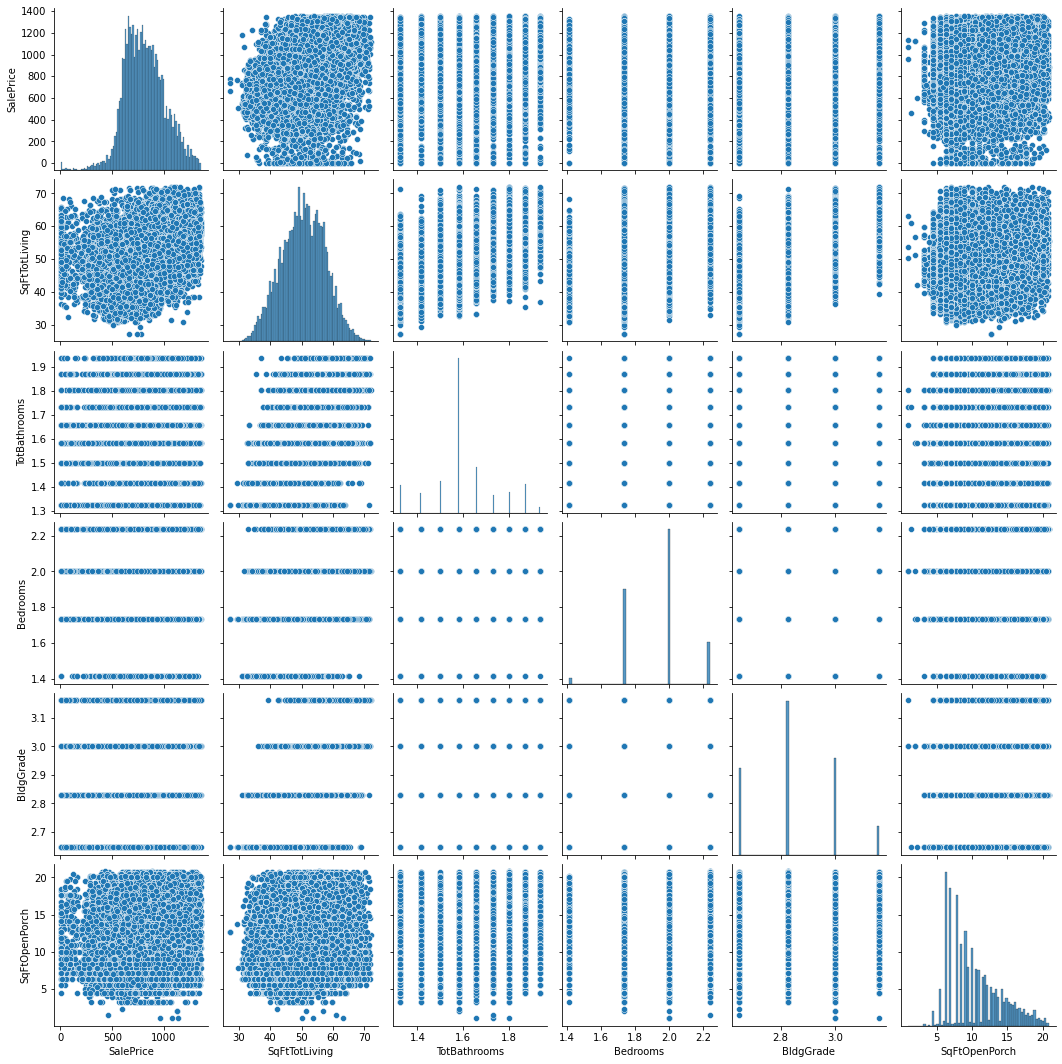

In [27]:
pos_cor_cols2 = ['SalePrice','SqFtTotLiving', 'TotBathrooms',
                'Bedrooms', 'BldgGrade', 'SqFtOpenPorch']
pos_cor_cols_df2 = df[pos_cor_cols2]
sns.pairplot(pos_cor_cols_df2)
plt.show()

The Pairplot visualizes the correlation between the selected variables. While none of variables appear to be linear, SqFtTotLiving had the highest correlation and will be used for further analysis.

In [28]:
ssm_df = df[["SalePrice", "SqFtTotLiving"]].copy()
ssm_df.dropna(inplace=True)

In [29]:
ssm = ols(formula="SalePrice ~ SqFtTotLiving", data = ssm_df)
ssm_results = ssm.fit()

In [30]:
ssm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                 1.446e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:50:16   Log-Likelihood:            -3.2590e+05
No. Observations:               49400   AIC:                         6.518e+05
Df Residuals:                   49398   BIC:                         6.518e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       119.7061      5.815     20.586      0.000     108.309     131.103
SqFtTotLiving    13.7088      0.114    120.267      0.000      13.485      13.932
==============================================================================
Omnibus:                     3322.437   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9756.716
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       5.061   Cond. No.                         372.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 2 Evaluation

R2 and Adj R2 are both 0.226 so only about 20% of the variability in SalePrice (dependent variable) can be  explained by SqFtTotLiving (independent variable) after the data was transformed. This is higher than model 1.

The Prob(F-statistic) which estimates the likelylood that this model resulting the way it does by chance is still 0.

##### Linearity

In [31]:
rainbow_statistic, rainbow_p_value = linear_rainbow(ssm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow statistic: 1.0272041998289043
Rainbow p-value: 0.017468810264153593


The linear_rainbox(model_results) from Stats models null-hypothesis is that the model is linear. The alternate hypothesis is that it is not linear. The p-value is slightly higher than model 1 and the R-squared increased.

##### Normality

For this I used the Jarque-Bera test and Jarque-Bera (JB) pvalue. The null hypothesis is that the residuals are normally distributed. The p-value is still below 0 meaning that normality is still violated. 

##### Homoscadasticity

This can be visualized using the predicted SalePrice vs the residuals.

In [32]:
y2 = ssm_df['SalePrice']
y_hat2 = ssm_results.predict()

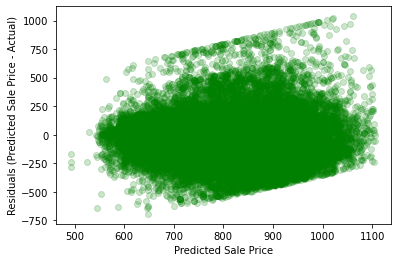

In [33]:
fig5, ax1 = plt.subplots()
ax1.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Predicted Sale Price - Actual)")
ax1.scatter(x=y_hat2, y=y_hat2-y2, color='green', alpha=0.2);

In [34]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y2-y_hat2,
                                                     ssm_df[['SalePrice']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-Statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-Statistic p-value: 0.0


Based on the graphical representation and het_breuschpagan test, we have sufficient evidence to reject the null hypothesis. While outliers were removed, it appears to be both an underestimation and over estimation for SalePrice. Further investigation is needed for this dependent variable.

### Model 3 - Negatively Correlated Variables

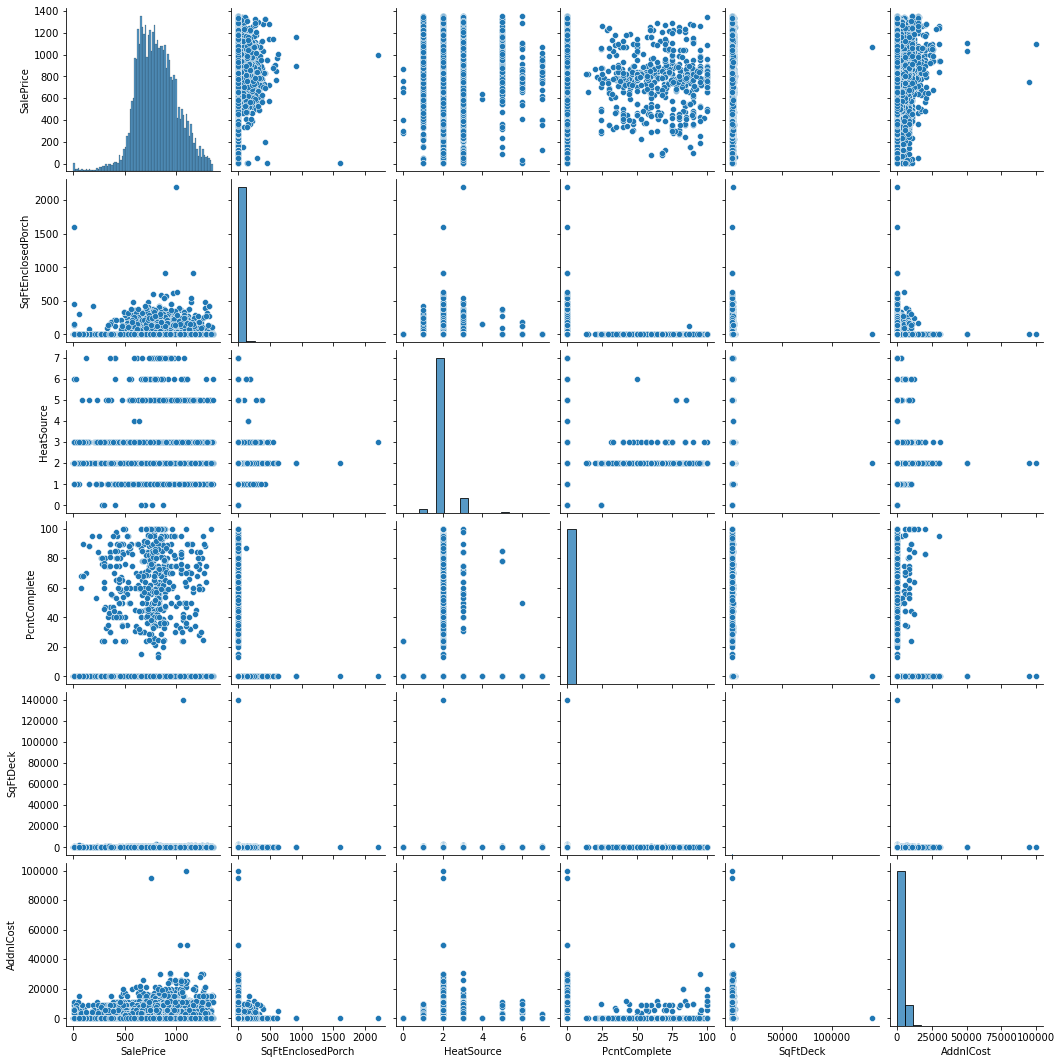

In [37]:
neg_cor_cols = ['SalePrice', 'SqFtEnclosedPorch','HeatSource',
                'PcntComplete','SqFtDeck', 'AddnlCost']
neg_cor_cols_df = df[neg_cor_cols]
sns.pairplot(neg_cor_cols_df);

The Pairplot visualizes the correlation between the selected variables. While none of variables appear to be linear, SqFtEnclosedPorch had the highest correlation and will be used for further analysis.

Similar to the positively correlated variables, some of the data appears to have outliers. A similar process as the positive variables will be used to clean that data. 

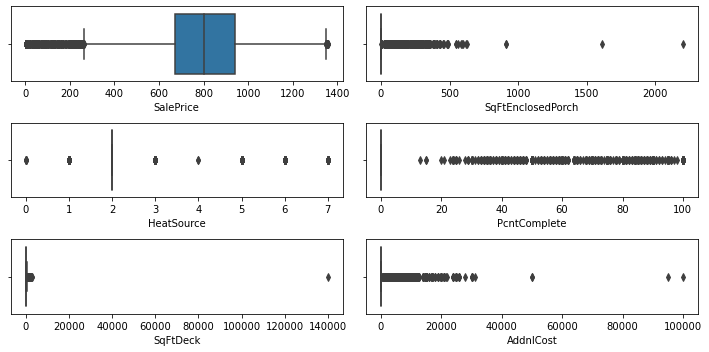

In [41]:
fig6, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(10,5))

sns.boxplot(x=df.SalePrice, ax=ax1);
sns.boxplot(x=df.SqFtEnclosedPorch, ax=ax2);
sns.boxplot(x=df.HeatSource, ax=ax3);
sns.boxplot(x=df.PcntComplete, ax=ax4);
sns.boxplot(x=df.SqFtDeck, ax=ax5);
sns.boxplot(x=df.AddnlCost, ax=ax6);

plt.tight_layout()

There appears to be a lot of variability in this data. It would make more sense to focus on SalePrice as most of much of the data is normalized. 

In [42]:
df['zscore'] = (df.SalePrice - df.SalePrice.mean() ) / df.SalePrice.std()
df.head()

,SalePrice,Township,SqFtLot,WfntFootage,BldgGrade,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,Bedrooms,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Condition,AddnlCost,SaleWarning,TotBathrooms,zscore
0,894.427191,26,10560,0,3.000000,0,0,64.807407,2410,1850,8,560,0,14.832397,0,390,7,3,1.732051,0,1,0,1,1968,0,0,4,0,15 51,1.802776,0.406544
1,854.400375,26,9853,0,2.645751,0,0,49.091751,1200,1200,6,0,500,10.488088,0,0,5,2,2.236068,0,1,0,1,1969,0,0,3,0,,1.732051,0.208068
3,499.949997,26,7750,0,2.828427,0,0,57.792733,2180,960,8,750,0,15.811388,0,0,5,2,2.236068,2,0,0,0,2019,0,58,3,5000,10,1.802776,-1.549498
4,452.769257,26,7750,0,2.828427,0,0,57.792733,2180,960,8,750,0,15.811388,0,0,5,2,2.236068,2,0,0,0,2019,0,58,3,5000,15,1.802776,-1.783447
5,987.420883,25,4280,0,2.645751,0,0,48.270074,1570,990,7,580,0,8.366600,0,240,7,2,2.236068,0,0,1,0,1919,0,0,5,0,,1.658312,0.867659


In [43]:
df = df[(df.zscore>-3) & (df.zscore<3)]

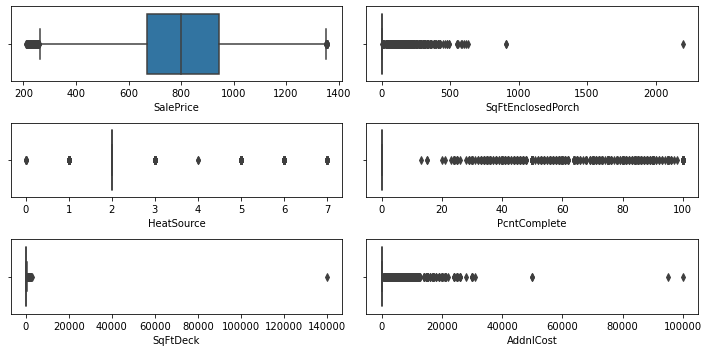

In [44]:
fig7, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(10,5))

sns.boxplot(x=df.SalePrice, ax=ax1);
sns.boxplot(x=df.SqFtEnclosedPorch, ax=ax2);
sns.boxplot(x=df.HeatSource, ax=ax3);
sns.boxplot(x=df.PcntComplete, ax=ax4);
sns.boxplot(x=df.SqFtDeck, ax=ax5);
sns.boxplot(x=df.AddnlCost, ax=ax6);

plt.tight_layout()

Using the zscore appeared to help remove 0 values from the SalePrice. 

In [45]:
tsm_df = df[["SalePrice", "SqFtEnclosedPorch"]].copy()
tsm_df.dropna(inplace=True)

In [57]:
tsm = ols(formula="SalePrice ~ SqFtEnclosedPorch", data = tsm_df)
tsm_results = tsm.fit()

In [58]:
tsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     12.09
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           0.000507
Time:                        15:33:08   Log-Likelihood:            -3.2867e+05
No. Observations:               49132   AIC:                         6.573e+05
Df Residuals:                   49130   BIC:                         6.574e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           816.2035      0.881    926.058      0.000     814.476     817.931
SqFtEnclosedPorch     0.1188      0.034      3.477      0.001       0.052       0.186
==============================================================================
Omnibus:                      551.928   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.198
Skew:                           0.260   Prob(JB):                    4.14e-124
Kurtosis:                       2.914   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 3 Evaluation

R2 and Adj R2 are both 0 so only about 0% of the variability in SalePrice (dependent variable) can be  explained by SqFtEnclosedPorch (independent variable) in this model.

The Prob(F-statistic) which estimates the likelylood that this model resulting the way it does has slightly increased, but it is low.

##### Linearity

In [60]:
rainbow_statistic, rainbow_p_value = linear_rainbow(tsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow statistic: 1.0102603113633997
Rainbow p-value: 0.21186878023575165


The linear_rainbox(model_results) from Stats models null-hypothesis is that the model is linear. The alternate hypothesis is that it is not linear. The p-value is higher, but taken into account with the F-statistic, while we have sufficient evidence to reject the null-hypothesis, the model violates the assumption of linearity.

##### Normality

For this I used the Jarque-Bera test and Jarque-Bera (JB) pvalue. The null hypothesis is that the residuals are normally distributed.  The alternative is that they are not. The p-value is 0 meaning that normality is violated. 

##### Homoscadasticity

This can be visualized using the predicted SalePrice vs the residuals.

In [61]:
y3 = tsm_df['SalePrice']
y_hat3 = tsm_results.predict()

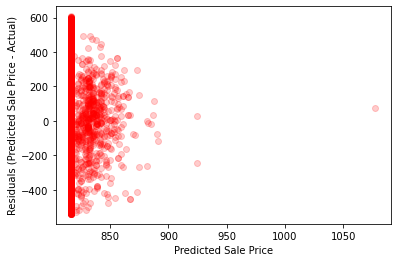

In [62]:
fig8, ax1 = plt.subplots()
ax1.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Predicted Sale Price - Actual)")
ax1.scatter(x=y_hat3, y=y_hat3-y3, color='red', alpha=0.2);

In [63]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y2-y_hat2,
                                                     ssm_df[['SalePrice']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-Statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-Statistic p-value: 0.0


Based on the graphical representation and het_breuschpagan test, we have sufficient evidence to reject the null hypothesis. There appears to be both an underestimation and over estimation for SalePrice. 

## Summary

We started with a baseline model where the only input feature was `SqFtTotLiving`.  Our baseline model had an r-squared of 0.152.  This model violated the linearity (p < 0.005), normality (p < 0.005), and homoscadasticity (p < 0.005) assumptions of linear regression.  The independence assumption was met by default because there was only one input feature.

The second model used `SqFtTotLiving` as the other input feature.  Our baseline model had an r-squared of 0.226.  This model violated the linearity (p < 0.005), normality (p < 0.005), and homoscadasticity (p < 0.005) assumptions of linear regression.  The independence assumption was met by default because there was only one input feature.

The final model for tested negatively correlated variables `SqFtEnclosedPorch`, `HeatSource`, and `PcntComplete`, `SqFtDeck`, and `AddnlCost`.  It had an r-squared of 0.000.  This model didn't appear to violate the linearity with (p < 0.211), visually it did. It also violated normality (p < 0.005), and homoscadasticity (p < 0.005).

We are able to address the following:
- Homes with larger total living space tend to have a higher price.
- Homes with more bedrooms tend to have a higher sell price.